# Мини-проект статистика
В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode

### Задание 1
Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

Если нужна помощь, напишите сюда

In [2]:
public_key = 'https://disk.yandex.ru/d/guhDSjFliVqwtg'

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [4]:
adv_df = pd.read_csv(download_url)

In [6]:
adv_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
adv_df['xyz_campaign_id'].nunique()

3

### Задание 2

Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

In [8]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [9]:
adv_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### Задание 3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

Hint: np.log()

<Axes: xlabel='Impressions', ylabel='Count'>

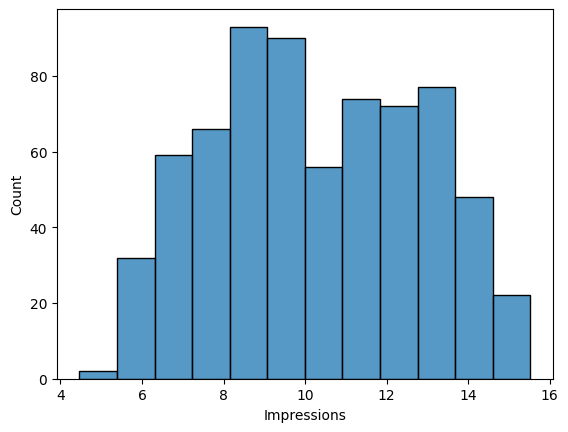

In [30]:
sns.histplot(np.log(adv_df.groupby('fb_campaign_id')['Impressions'].sum()))

### Задание 4

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

$$CTR = 
{clicks
\over impressions}$$
​
 

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [31]:
adv_df['ctr'] = adv_df['Clicks'] / adv_df['Impressions']

In [32]:
adv_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [36]:
adv_df.iloc[adv_df['ctr'].idxmax()]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
ctr                    0.001059
Name: 150, dtype: object

### Задание 5

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

<Axes: xlabel='ctr', ylabel='Count'>

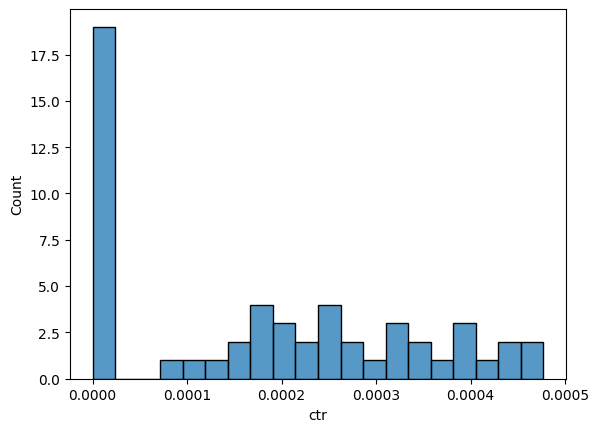

In [44]:
sns.histplot(adv_df[adv_df['xyz_campaign_id'] == 916]['ctr'], bins=20)

### Задание 6

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

$CPC= 
{spent
\over clicks}$

​
 

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [47]:
adv_df['cpc'] = adv_df['Spent'] / adv_df['Clicks']
adv_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [48]:
adv_df['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [52]:
q3, q1 = np.percentile(adv_df['cpc'].dropna(), [75 ,25])
iqr = q3 - q1
round(iqr, 2)

0.25

<Axes: xlabel='cpc', ylabel='Count'>

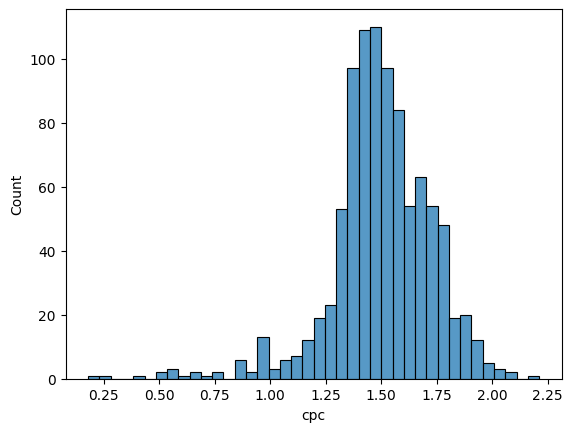

In [53]:
sns.histplot(adv_df['cpc'].dropna())

### Задание 7

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

<Axes: xlabel='cpc', ylabel='Count'>

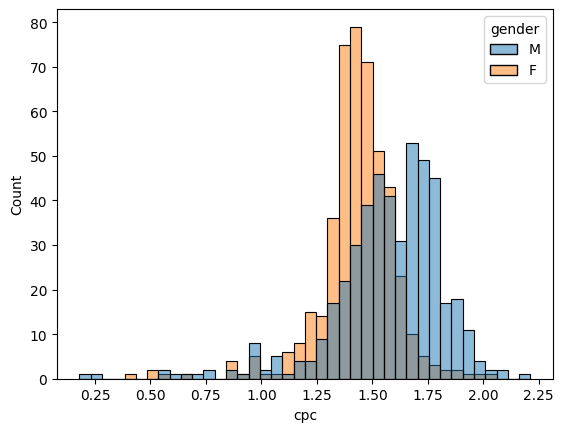

In [54]:
sns.histplot(data=adv_df, x=adv_df['cpc'].dropna(), hue=adv_df['gender'])

### Задание 8

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [56]:
adv_df['conv_rate'] = adv_df['Approved_Conversion'] / adv_df['Clicks']
adv_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,conv_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


In [58]:
round(adv_df[adv_df['ad_id'] == 1121814]['conv_rate'] * 100, 2)

860    3.09
Name: conv_rate, dtype: float64